# Netflix Shows | EDA and Visualization using Python

#Dataset
 Netflix is one of the most popular media and video streaming platforms. They have more movies or tv shows available on their platform, they have over 278M Subscribers globally.
  This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.


---

1. show_id: Unique ID for every Movies and TV Shows.
2. type: Identifier- A movies or TV shows
3. title: Name of the movies and TV shows
4. director: Name of director of movies and tv shows
5. cast: Actors involves in the movies and shows
6. country: Country where the movies/shows was produced
7. date_added: Date it was added on Netflix
8. release_year: Actual release year of the movies and shows
9. rating: TV rating of the movies and shows
10. duration: Total duration in minutes or number of the season
11. listed_in: Genere of the movies and shows
12. description: The summary of movies and shows


Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Importing Dataset

In [2]:
netflix = pd.read_csv('/content/netflix.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Pre-processing and Cleaning of the Dataset

In [3]:
netflix.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
netflix.shape

(8807, 12)

In [6]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Handling the null values

In [7]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
netflix.duplicated().sum()

0

In [9]:
# replacing null values in Director with "Unknown"
netflix["director"].fillna("Unknown", inplace = True)

# replacing null values in Cast with "Unknown"
netflix["cast"].fillna("Unknown", inplace = True)

# replacing null values in Country with "Unknown"
netflix["country"].fillna("Unknown", inplace = True)

# replacing null values in Date_Added with "Unknown"
netflix["date_added"].fillna("Unknown", inplace = True)

# replacing null values in Rating with "Unknown"
netflix["rating"].fillna("unknown", inplace = True)

# replacing null values in Duration with "Unknown"
netflix["duration"].fillna("Unknown", inplace = True)


In [10]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Exploratory Data Analysis and Visualization

In [12]:
# getting most movies by directors

netflix['director'].value_counts().head(10)


director
Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: count, dtype: int64

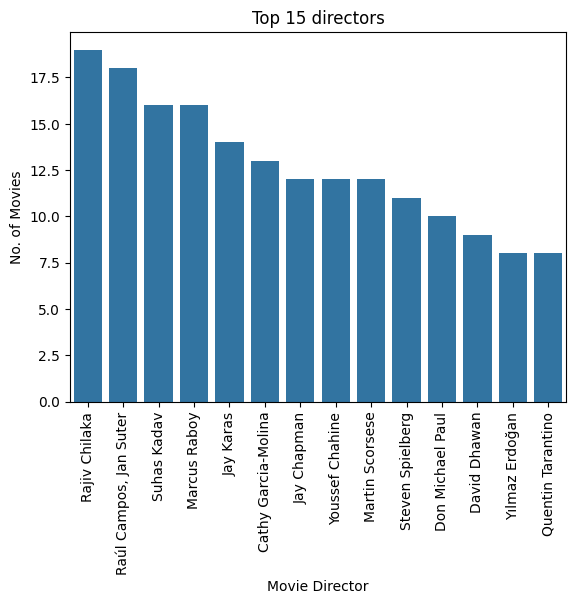

In [13]:
directors = netflix.director.value_counts()
sns.barplot(y = directors[1:15], x= directors.index[1:15])
plt.title("Top 15 directors")
plt.xlabel("Movie Director")
plt.ylabel('No. of Movies')
plt.xticks(rotation=90)

plt.show()

In [14]:
# getting most movies by actors
netflix['cast'].value_counts().head(10)

cast
Unknown                                                                                                                   825
David Attenborough                                                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                    14
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
Craig Sechler                                                                                                               6
David Spade, London Hughes, Fortune Feimster                                                                                6
Kevin Hart                                                                                                       

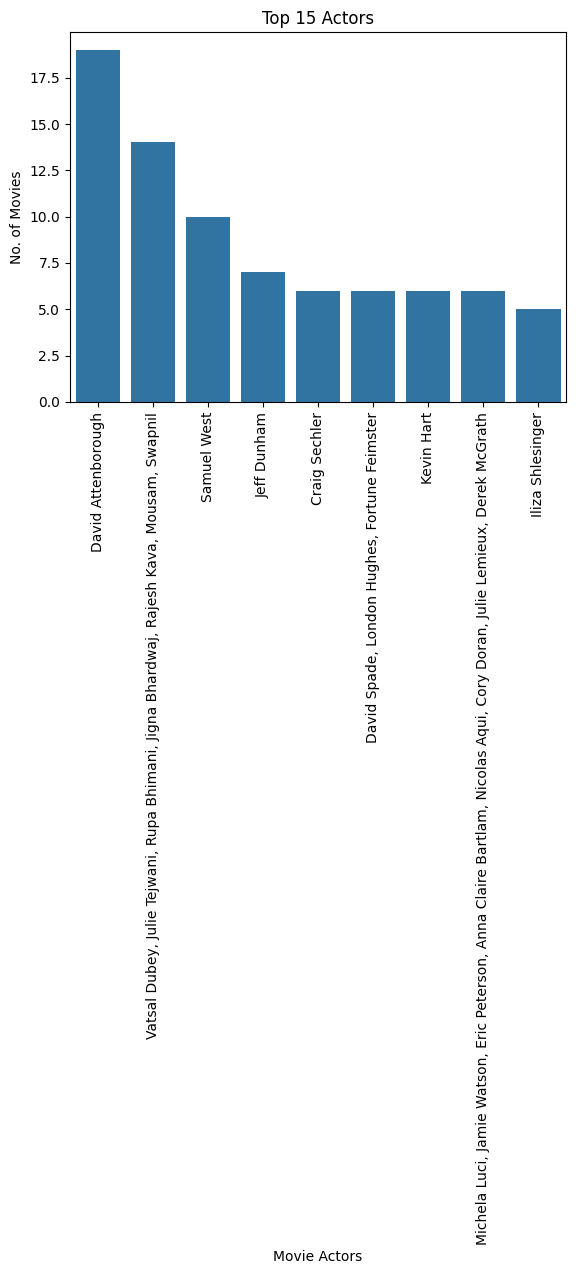

In [15]:
# Top 15 Actors

actors = netflix.cast.value_counts()
sns.barplot(y = actors[1:10], x= actors.index[1:10])
plt.title("Top 15 Actors")
plt.xlabel("Movie Actors")
plt.ylabel('No. of Movies')
plt.xticks(rotation=90)

plt.show()

In [16]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [17]:
# getting types of shows

netflix['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

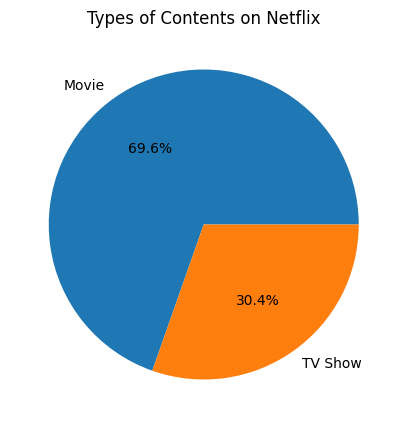

In [18]:
# Contents available on Netflix
plt.figure(figsize = (5,5))
plt.title("Types of Contents on Netflix")
plt.axis('equal')

plt.pie(netflix['type'].value_counts(), labels = netflix['type'].value_counts().index, autopct = '%1.1f%%')
plt.show()


In [19]:
# Production of contents in Countries

netflix['country'].value_counts().head(10)


country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

In [20]:

netflix.groupby('country')['type'].value_counts().head(10)


country                                              type   
, France, Algeria                                    Movie       1
, South Korea                                        TV Show     1
Argentina                                            Movie      38
                                                     TV Show    18
Argentina, Brazil, France, Poland, Germany, Denmark  Movie       1
Argentina, Chile                                     Movie       2
Argentina, Chile, Peru                               Movie       1
Argentina, France                                    Movie       1
Argentina, France, United States, Germany, Qatar     Movie       1
Argentina, Italy                                     Movie       1
Name: count, dtype: int64

Text(0, 0.5, 'Percentage of the movies')

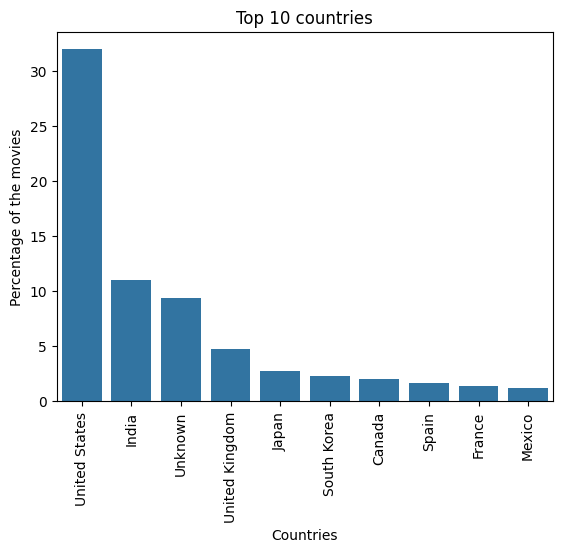

In [21]:
# Top 10 countries
country = netflix.country.value_counts()
lim = 15
sns.barplot(y=country[:10]/len(netflix)*100, x=country.index[:10])
plt.title(f'Top 10 countries')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Percentage of the movies')

In [22]:
by_year=netflix.groupby(['type','release_year']).agg({'type':'count'}).rename(columns={'type':'type_count'}).reset_index()
by_year

,type,release_year,type_count
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,380
116,TV Show,2019,397
117,TV Show,2020,436


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'India'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Mexico'),
  Text(5, 0, 'Turkey'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'Nigeria'),
  Text(8, 0, 'Japan'),
  Text(9, 0, 'France'),
  Text(10, 0, 'South Korea'),
  Text(11, 0, 'Spain'),
  Text(12, 0, 'Canada'),
  Text(13, 0, 'Taiwan'),
  Text(14, 0, 'Egypt')])

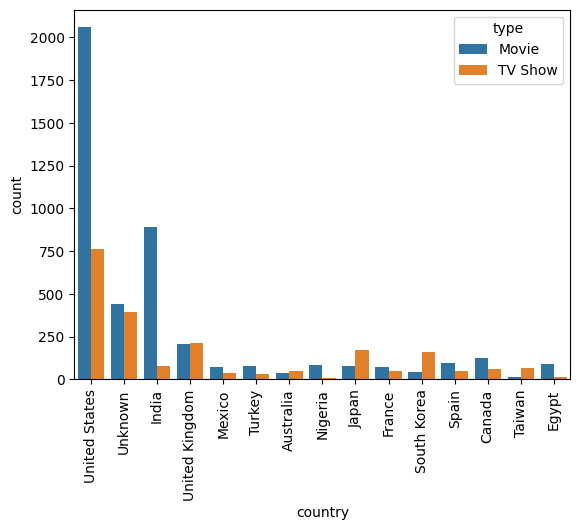

In [23]:
# checking which country makes movies and TV shows
top_countries = netflix[netflix.country.isin(country.head(lim).index)]
sns.countplot(x='country',data = top_countries, hue = 'type')
plt.xticks(rotation=90)

In [24]:
# Checking which are types of rating
rating=netflix['rating'].value_counts()
rating


rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
unknown        4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

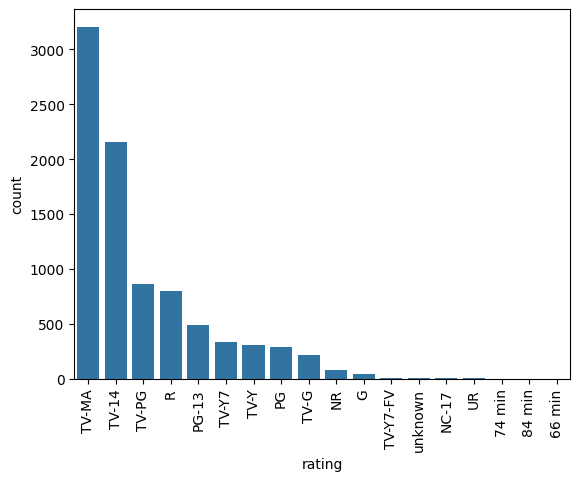

In [25]:
sns.countplot(netflix, x='rating', order= rating.index)
plt.xticks(rotation=90)
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Japan'),
  Text(5, 0, 'South Korea'),
  Text(6, 0, 'Canada')])

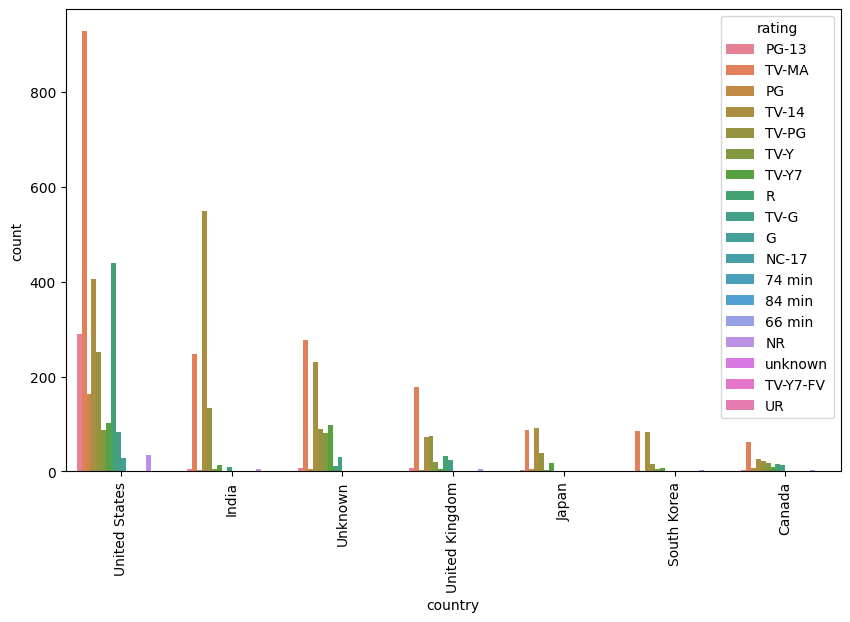

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data=netflix, x='country',hue='rating', order=country.head(lim//2).index)
plt.xticks(rotation = 90)

In [27]:
np.sort(netflix.duration.unique())


array(['1 Season', '10 Seasons', '10 min', '100 min', '101 min',
       '102 min', '103 min', '104 min', '105 min', '106 min', '107 min',
       '108 min', '109 min', '11 Seasons', '11 min', '110 min', '111 min',
       '112 min', '113 min', '114 min', '115 min', '116 min', '117 min',
       '118 min', '119 min', '12 Seasons', '12 min', '120 min', '121 min',
       '122 min', '123 min', '124 min', '125 min', '126 min', '127 min',
       '128 min', '129 min', '13 Seasons', '13 min', '130 min', '131 min',
       '132 min', '133 min', '134 min', '135 min', '136 min', '137 min',
       '138 min', '139 min', '14 min', '140 min', '141 min', '142 min',
       '143 min', '144 min', '145 min', '146 min', '147 min', '148 min',
       '149 min', '15 Seasons', '15 min', '150 min', '151 min', '152 min',
       '153 min', '154 min', '155 min', '156 min', '157 min', '158 min',
       '159 min', '16 min', '160 min', '161 min', '162 min', '163 min',
       '164 min', '165 min', '166 min', '167 min', '1

Text(0.5, 1.0, 'Content release per year')

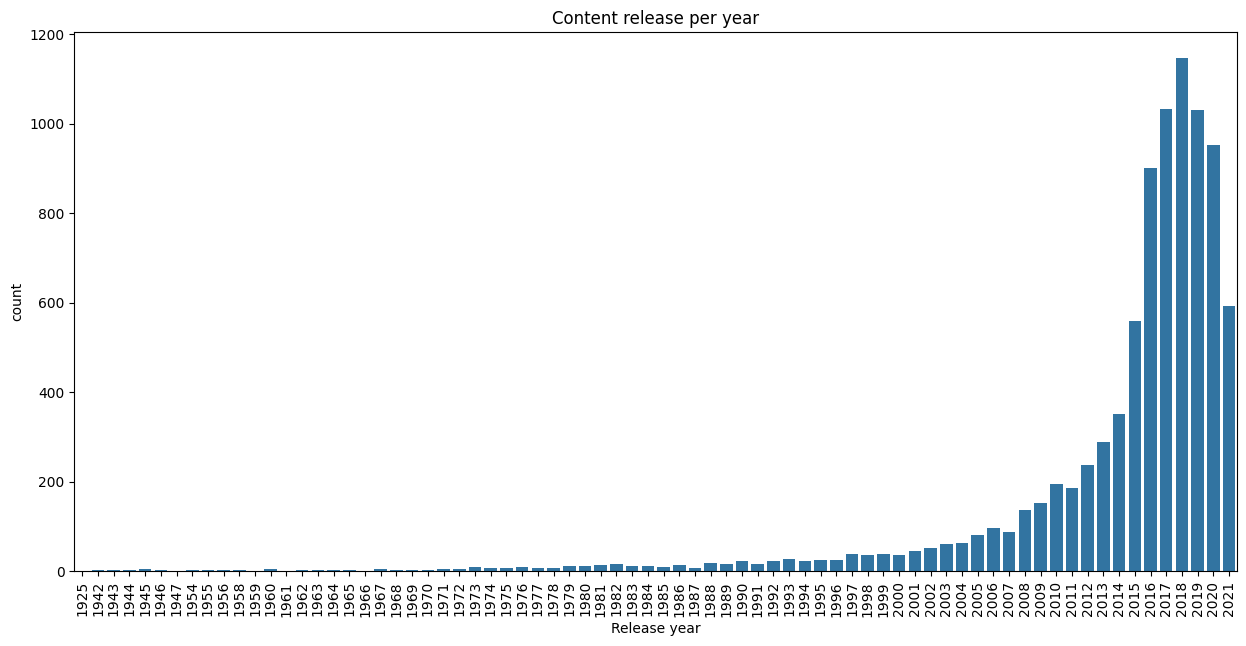

In [28]:
plt.figure(figsize = (15, 7))
sns.countplot(netflix, x='release_year')
plt.xticks(rotation='vertical')
plt.xlabel('Release year')
plt.title('Content release per year')

Text(0.5, 1.0, 'Content release per year')

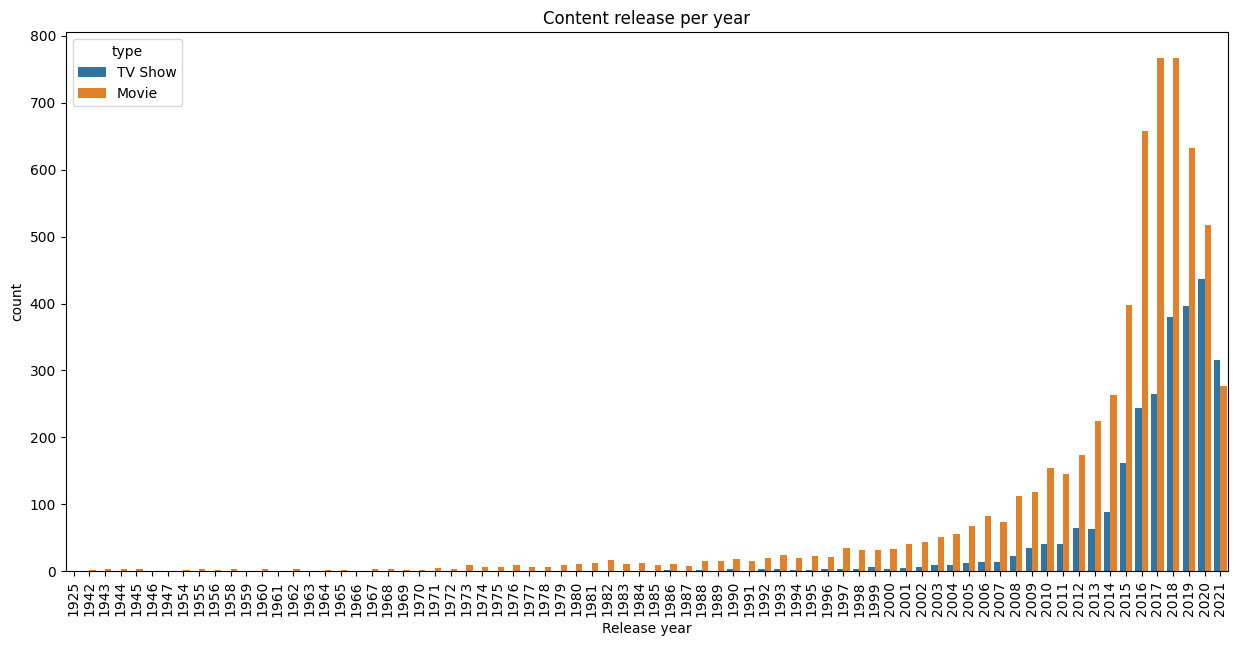

In [29]:
# Movies and TV Shows by Year

plt.figure(figsize = (15, 7))
sns.countplot(netflix, x='release_year', hue='type')
plt.xticks(rotation='vertical')
plt.xlabel('Release year')
plt.title('Content release per year')

Text(0.5, 1.0, 'Distribuion of content along the Year of release')

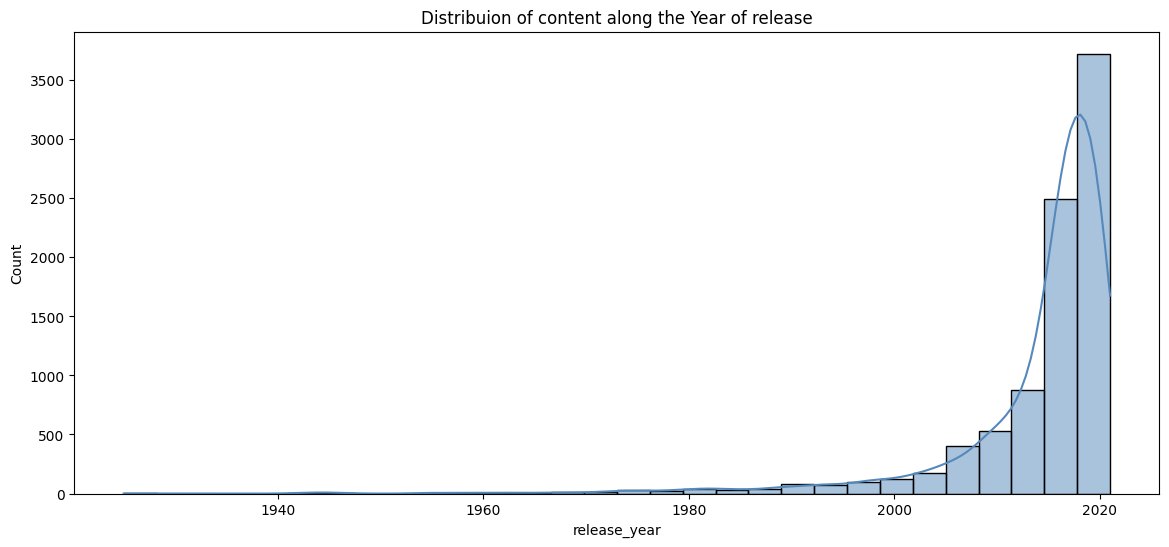

In [30]:
# distribution of the content release year
plt.figure(figsize=(14, 6))
sns.histplot(netflix.release_year, bins= 30, kde=True, color = '#58B')
plt.title('Distribuion of content along the Year of release')

In [31]:
netflix['listed_in'] = netflix.listed_in.str.split(', ')
gen = netflix.listed_in.explode().sort_values()
gen.value_counts()

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

<Axes: ylabel='listed_in'>

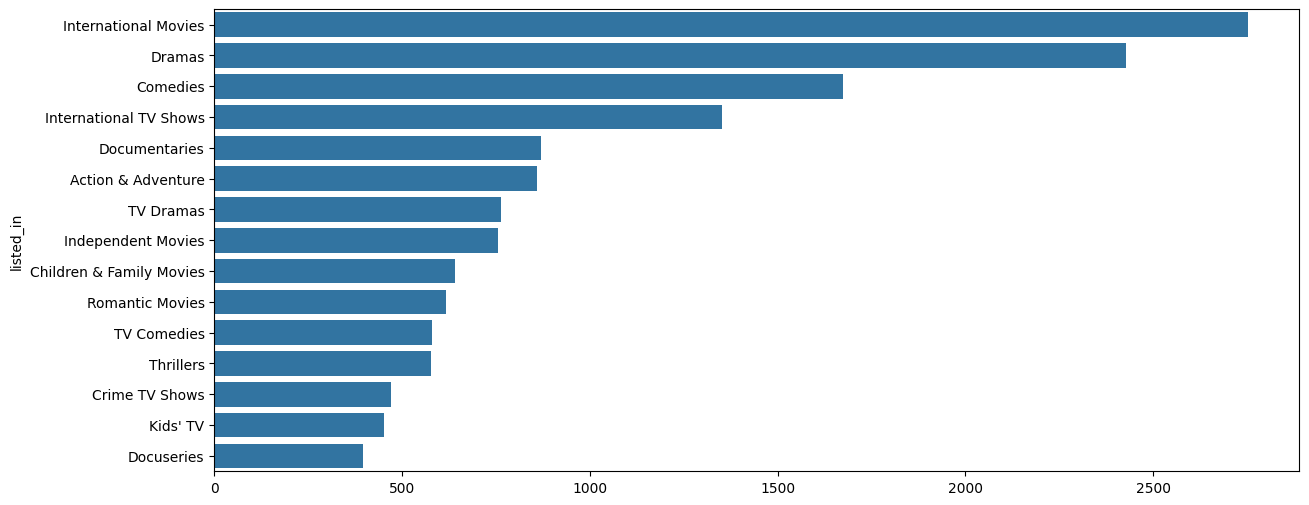

In [32]:
# making the plot of the same
plt.figure(figsize = (14, 6))
sns.barplot(x=gen.value_counts().head(lim).values, y=gen.value_counts().head(lim).index)


# **Conclusion**

In-depth Exploratory Data Analysis on Netflix shows to uncover patterns, trends, and insights using Python.

### Data Collection, Cleaning and Visualization:

*   Imported Netflix dataset and performed data cleaning to handle missing values, duplicates, and inconsistencies.
*  Used libraries like Pandas for data manipulation and preprocessing.
*   Created insightful visualizations using Matplotlib and Seaborn to illustrate trends in show genres, release years, and country-wise distributions.
*   Developed interactive visualizations with Plotly to enhance user engagement and data exploration.

### Key Learning


*   Gained proficiency in data cleaning, preprocessing, and analysis using Python.
*   Developed skills in data visualization and storytelling through graphical representations.
*   Enhanced ability to derive actionable insights from large datasets.

### Key Insights


* Rajeev Chilka has made 19 movies and Raul Campos, jan Suter has made 18 movies.
* David Attenborough has acted 19 movies.
* Netflix has 69.6% Movies and 30.4% TV Shows.
* The United States produces more movies and TV shows, approx. 33% in the world.
* The India produces movies, approx. 12% in the world.
* In the 2018, maximum contents are released on Netflix.
* More films genere are International Movie, Dramas and Comedies.  

### Technologies and Tools:

*   Python
*  Pandas
*  NumPy
*  Matplotlib
*  Seaborn